In [ ]:
### import necessary libraries 

import numpy as np
from google.colab import drive 
import pandas as pd 
import datetime as datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, meanabs
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats
import plotly.figure_factory as ff
import plotly.express as px
import io

### upload features_30_sec.csv file from your system
from google.colab import files
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['features_30_sec.csv']))

Saving features_30_sec.csv to features_30_sec.csv


In [ ]:
# Librosa is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

upload one of the audio files and see the plots for its features

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
y, sr = librosa.load('blues.00000.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

print('Check Len of Audio:', len(y)/sr, 'sec')

y: [ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332 sec


Text(0.5, 0, 'Time')

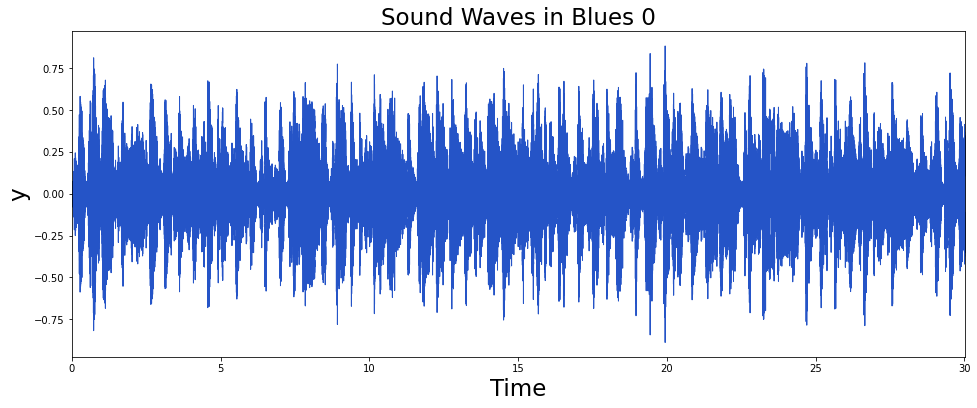

In [ ]:
audio_file, _ = librosa.effects.trim(y)

plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = audio_file, sr = sr, color = "#2554C7");
plt.title("Sound Waves in Blues 0", fontsize = 23);
plt.ylabel("y", fontsize = 23)
plt.xlabel("Time", fontsize = 23)

Fourier Transform

In [ ]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


Text(0.5, 0, 'Fourier Coefficients')

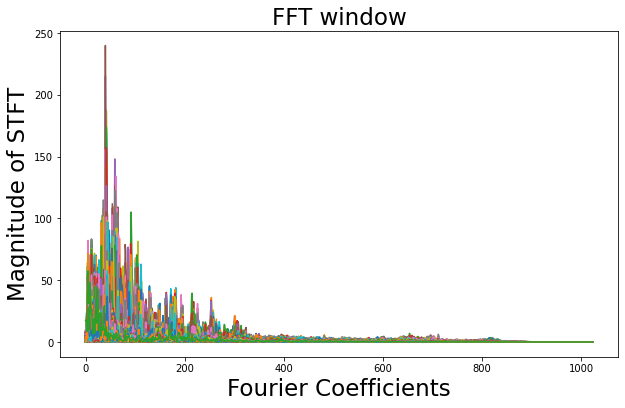

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(D);
plt.title("FFT window", fontsize = 23);
plt.ylabel("Magnitude of STFT", fontsize = 23)
plt.xlabel("Fourier Coefficients", fontsize = 23)

Text(0.5, 0, 'Time')

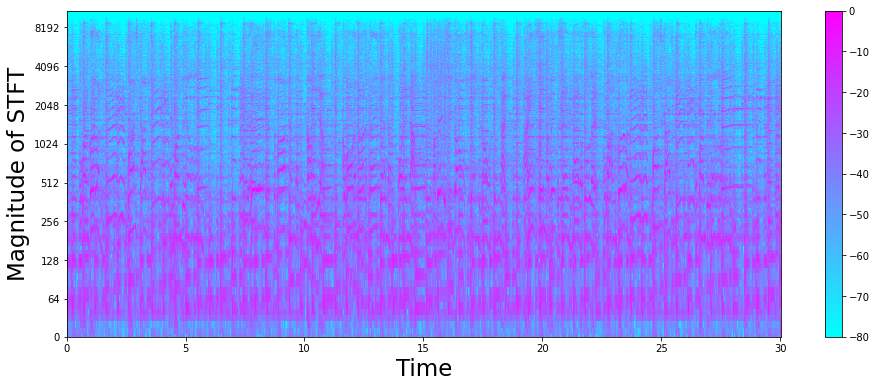

In [ ]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D, ref = np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool')
plt.colorbar();
#plt.title("Spectrogram", fontsize = 23);
plt.ylabel("Magnitude of STFT", fontsize = 23)
plt.xlabel("Time", fontsize = 23)

Text(0.5, 0, 'Time')

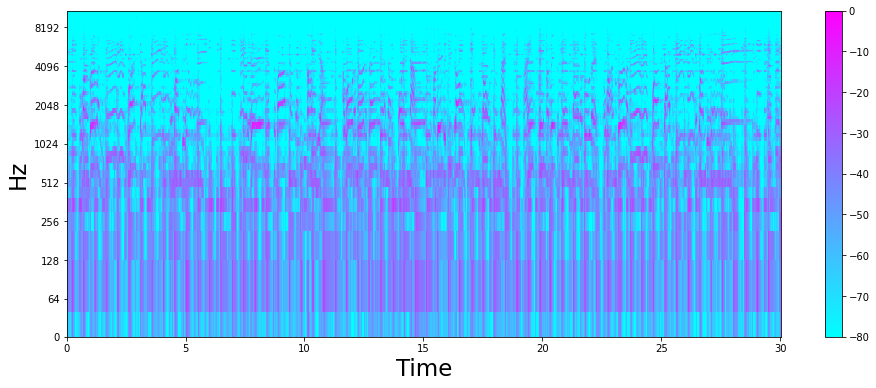

In [ ]:
S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
#plt.title("Blues Mel Spectrogram", fontsize = 23);
plt.ylabel("Hz", fontsize = 23)
plt.xlabel("Time", fontsize = 23)

In [ ]:
# the rate at which the signal changes from positive to negative or back.
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(sum(zero_crossings))

55031


**Harmonics and Perceptrual**

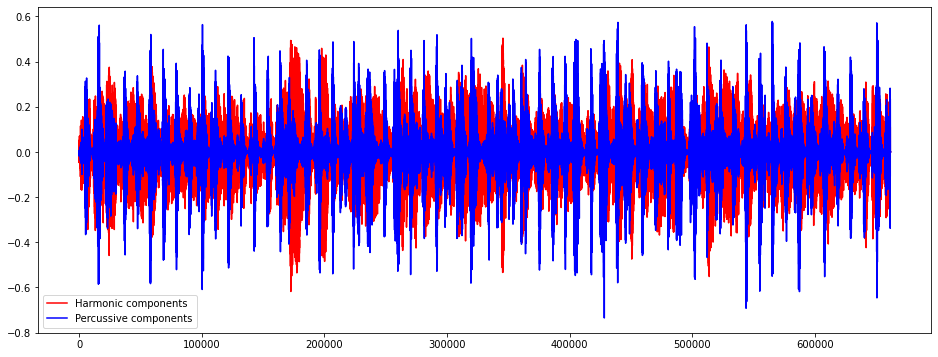

In [ ]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = 'r', label='Harmonic components');
plt.plot(y_perc, color = 'b', label='Percussive components');
plt.legend();

In [ ]:
##### Tempo BMP (beats per minute)
tempo, _ = librosa.beat.beat_track(y, sr = sr)
tempo

123.046875

**Spectral Centroids**

In [ ]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

Centroids: [2175.02383311 2103.86995762 1955.28566681 ... 1490.45684641 1506.97560844
 1442.64520571] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


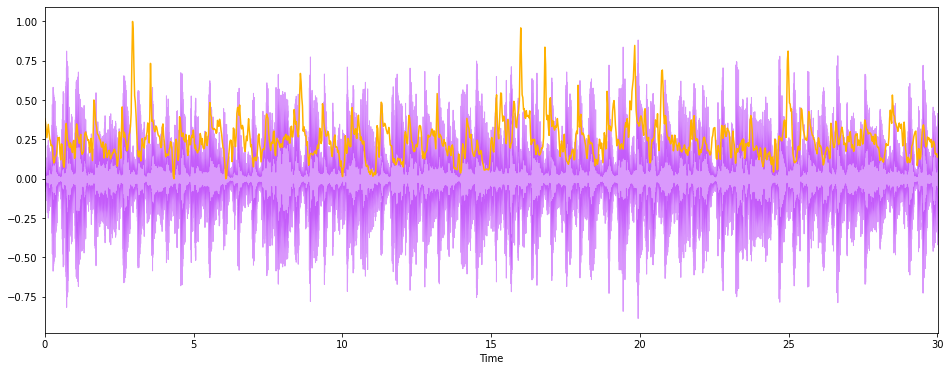

In [ ]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

**Mel-Frequency Cepstral Coefficients:**

In [ ]:
mfcc = librosa.feature.mfcc(audio_file, sr=sr)
print(mfcc.shape, '\n')
print('Mean:', mfcc.mean(), '\n')
print('Var:', mfcc.var())

(20, 1293) 

Mean: 1.9380163 

Var: 1767.0273


Text(0.5, 0, 'Time')

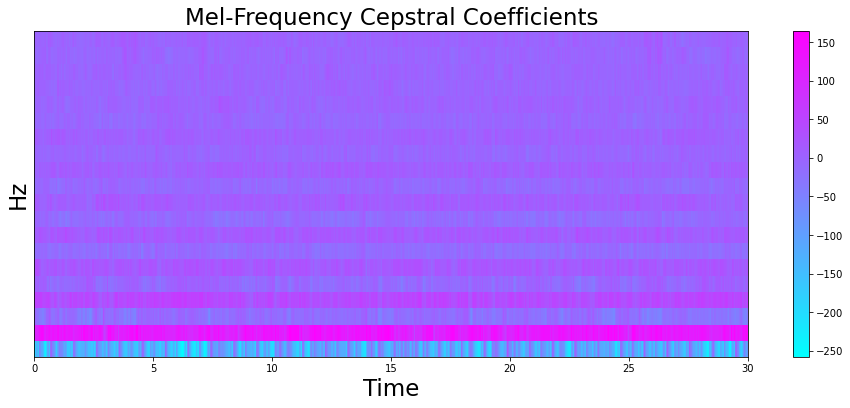

In [ ]:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfcc, sr=sr, x_axis='time', cmap = 'cool');
plt.colorbar();
plt.title("Mel-Frequency Cepstral Coefficients", fontsize = 23);
plt.ylabel("Hz", fontsize = 23)
plt.xlabel("Time", fontsize = 23)

Correlation heatmap of the features

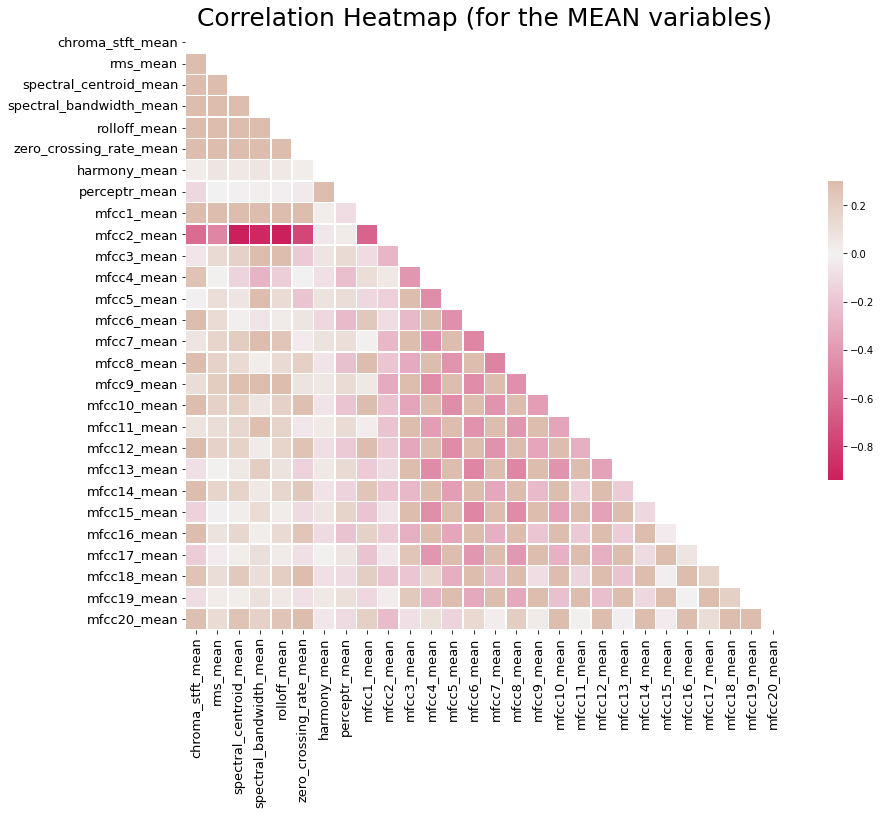

In [ ]:
df = data.copy()
# Computing the Correlation Matrix
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13);
#plt.savefig("Corr Heatmap.jpg")

Text(0, 0.5, 'BPM')

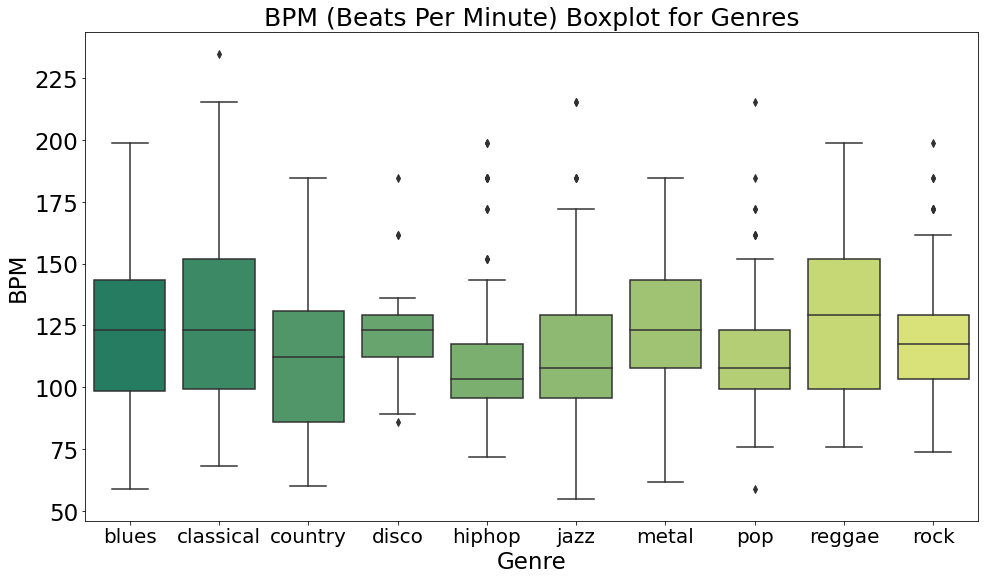

In [ ]:
####Box Plot for Genres Distributions

x = df[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'summer');

plt.title('BPM (Beats Per Minute) Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 23);
plt.xlabel("Genre", fontsize = 23)
plt.ylabel("BPM", fontsize = 23)

# Modeling

In [ ]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold ,train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.preprocessing import minmax_scale
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Modeling with 30-seconds features

In [ ]:
##### Upload 30-seconds feature file
from google.colab import files
uploaded = files.upload()
file_name = next(iter(uploaded))
data = pd.read_csv(file_name) 
df = data.iloc[0:, 1:] ####omiiting first column (names of the audio files)
df.head()

Saving features_30_sec.csv to features_30_sec (1).csv


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
# Preprocessing Scaling and Normalization
y = df['label'] # genre variable.
print(y.shape)
X = df.loc[:, df.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)


(1000,)


Train/Test data split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# This function get a model, and fit it on training data and giving the accuracy metrics on test/training data
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    #print(confusion_matrix(y_test, preds))
    print('* ' ,title,':')
    print('   Training Accuracy: ', round(accuracy_score(y_train, y_pred_train)*100, 3),'%')   
    print('   Testing Accuracy:' , round(accuracy_score(y_test, y_pred_test)*100, 3),'%','\n')


    #training evaluations
    print(f'Test measures of the model on the all training data:')
    print(f'  F1 score with macro averaging for traing: {f1_score(y_train, y_pred_train, average="macro")}')
    print(f'  Precision score with macro averaging for traing: {precision_score(y_train, y_pred_train, average="macro")}')
    print(f'  Recall score with macro averaging for traing: {recall_score(y_train, y_pred_train, average="macro")}')
    print('','\n')

    #testing evaluations
    print(f'Test measures of the model on the all testing data:')
    print(f'  F1 score with macro averaging for testing: {f1_score(y_test, y_pred_test, average="macro")}')
    print(f'  Precision score with macro averaging for testing: {precision_score(y_test, y_pred_test, average="macro")}')
    print(f'  Recall score with macro averaging for testing: {recall_score(y_test, y_pred_test, average="macro")}')
    print('','\n')

    #plot confusion matrix 
    cm = confusion_matrix(y_test, y_pred_test)
    ConfusionMatrixDisplay(cm, display_labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).plot()
    plt.show()
    print('','\n')
    print('----------------------------------','\n')

**Training different models (with their default hyperparameters) and compare their results**

*  Decission trees :
   Training Accuracy:  99.875 %
   Testing Accuracy: 56.5 % 

Test measures of the model on the all training data:
  F1 score with macro averaging for traing: 0.9987077410479804
  Precision score with macro averaging for traing: 0.9987654320987656
  Recall score with macro averaging for traing: 0.9986666666666666
 

Test measures of the model on the all testing data:
  F1 score with macro averaging for testing: 0.5665287633661484
  Precision score with macro averaging for testing: 0.5599569471337207
  Recall score with macro averaging for testing: 0.5838022251500512
 



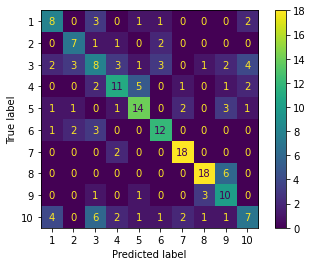

 

---------------------------------- 

*  Random Forest :
   Training Accuracy:  99.875 %
   Testing Accuracy: 68.5 % 

Test measures of the model on the all training data:
  F1 score with macro averaging for traing: 0.9987077410479804
  Precision score with macro averaging for traing: 0.9987654320987656
  Recall score with macro averaging for traing: 0.9986666666666666
 

Test measures of the model on the all testing data:
  F1 score with macro averaging for testing: 0.6927081979255891
  Precision score with macro averaging for testing: 0.687883311704822
  Recall score with macro averaging for testing: 0.7148207436685698
 



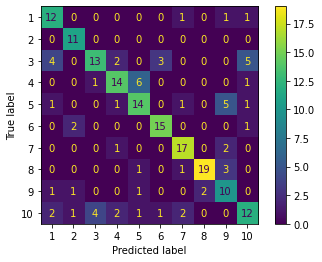

 

---------------------------------- 

*  Support Vector Machine :
   Training Accuracy:  78.5 %
   Testing Accuracy: 64.0 % 

Test measures of the model on the all training data:
  F1 score with macro averaging for traing: 0.7777478362238378
  Precision score with macro averaging for traing: 0.7861755561286403
  Recall score with macro averaging for traing: 0.7791593201758905
 

Test measures of the model on the all testing data:
  F1 score with macro averaging for testing: 0.6493850331502806
  Precision score with macro averaging for testing: 0.6555133094173342
  Recall score with macro averaging for testing: 0.6628402137315181
 



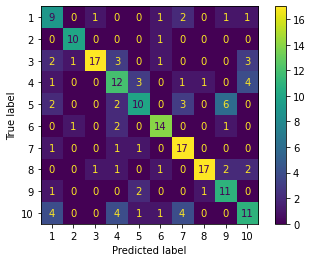

 

---------------------------------- 

*  Logistic Regression :
   Training Accuracy:  75.0 %
   Testing Accuracy: 63.5 % 

Test measures of the model on the all training data:
  F1 score with macro averaging for traing: 0.7384024385745974
  Precision score with macro averaging for traing: 0.747463136093204
  Recall score with macro averaging for traing: 0.7443674510291547
 

Test measures of the model on the all testing data:
  F1 score with macro averaging for testing: 0.6431825002521927
  Precision score with macro averaging for testing: 0.6494941829183315
  Recall score with macro averaging for testing: 0.6696758893280633
 



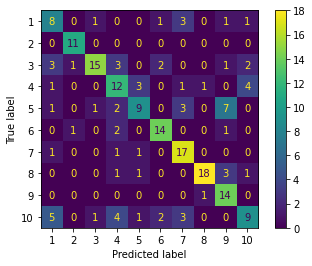

 

---------------------------------- 

*  KNN :
   Training Accuracy:  83.0 %
   Testing Accuracy: 67.0 % 

Test measures of the model on the all training data:
  F1 score with macro averaging for traing: 0.8286576715897379
  Precision score with macro averaging for traing: 0.8368228805290153
  Recall score with macro averaging for traing: 0.8278902465581499
 

Test measures of the model on the all testing data:
  F1 score with macro averaging for testing: 0.6805708115970293
  Precision score with macro averaging for testing: 0.6912360444215283
  Recall score with macro averaging for testing: 0.6912157078026644
 



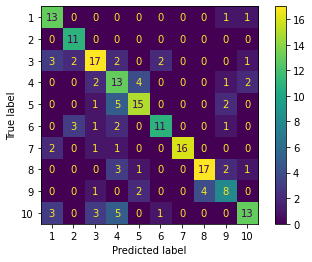

 

---------------------------------- 

*  gradient boosting classifier :
   Training Accuracy:  99.875 %
   Testing Accuracy: 70.0 % 

Test measures of the model on the all training data:
  F1 score with macro averaging for traing: 0.9987088175267609
  Precision score with macro averaging for traing: 0.9986842105263157
  Recall score with macro averaging for traing: 0.99875
 

Test measures of the model on the all testing data:
  F1 score with macro averaging for testing: 0.712637709629974
  Precision score with macro averaging for testing: 0.7116954577406858
  Recall score with macro averaging for testing: 0.7276160152247109
 



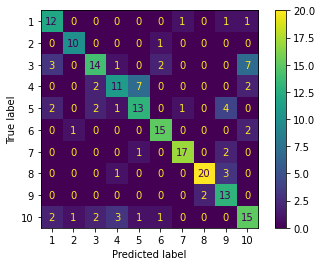

 

---------------------------------- 



In [ ]:
# Decision trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier()
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC()
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# KNN
knn = KNeighborsClassifier()
model_assess(knn, "KNN")

# XGboosing
xgb = XGBClassifier()
model_assess(xgb, "gradient boosting classifier")

Check how many samples of each class (genre label) were in the training dataset

In [ ]:
for label in y.unique(): print(label,'---', 'Number of samples:', sum(y_train==label))

blues --- Number of samples: 85
classical --- Number of samples: 89
country --- Number of samples: 73
disco --- Number of samples: 78
hiphop --- Number of samples: 77
jazz --- Number of samples: 82
metal --- Number of samples: 80
pop --- Number of samples: 76
reggae --- Number of samples: 85
rock --- Number of samples: 75


In [ ]:
######Here we use stratify splitting to mainain the proportion of each class in both training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
for label in y.unique(): print(label,'---', 'Number of samples:', sum(y_train==label))

blues --- Number of samples: 80
classical --- Number of samples: 80
country --- Number of samples: 80
disco --- Number of samples: 80
hiphop --- Number of samples: 80
jazz --- Number of samples: 80
metal --- Number of samples: 80
pop --- Number of samples: 80
reggae --- Number of samples: 80
rock --- Number of samples: 80


*  Decission trees :
   Training Accuracy:  99.875 %
   Testing Accuracy: 54.0 % 

Test measures of the model on the all training data:
  F1 score with macro averaging for traing: 0.9987499511699676
  Precision score with macro averaging for traing: 0.9987654320987656
  Recall score with macro averaging for traing: 0.99875
 

Test measures of the model on the all testing data:
  F1 score with macro averaging for testing: 0.5458281889760295
  Precision score with macro averaging for testing: 0.5732083937328355
  Recall score with macro averaging for testing: 0.54
 



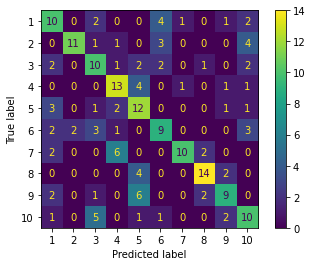

 

---------------------------------- 

*  Random Forest :
   Training Accuracy:  99.875 %
   Testing Accuracy: 80.5 % 

Test measures of the model on the all training data:
  F1 score with macro averaging for traing: 0.9987499511699676
  Precision score with macro averaging for traing: 0.9987654320987656
  Recall score with macro averaging for traing: 0.99875
 

Test measures of the model on the all testing data:
  F1 score with macro averaging for testing: 0.8061139480972599
  Precision score with macro averaging for testing: 0.8126418508392191
  Recall score with macro averaging for testing: 0.8049999999999999
 



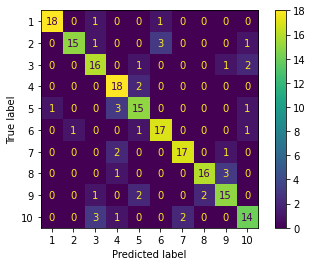

 

---------------------------------- 

*  Support Vector Machine :
   Training Accuracy:  76.875 %
   Testing Accuracy: 78.0 % 

Test measures of the model on the all training data:
  F1 score with macro averaging for traing: 0.7672113355699417
  Precision score with macro averaging for traing: 0.7729312278657172
  Recall score with macro averaging for traing: 0.76875
 

Test measures of the model on the all testing data:
  F1 score with macro averaging for testing: 0.7829423625227466
  Precision score with macro averaging for testing: 0.7911048696894707
  Recall score with macro averaging for testing: 0.78
 



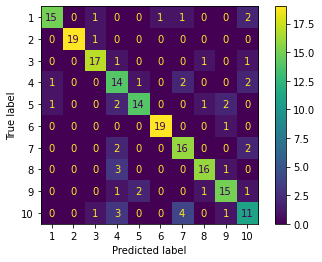

 

---------------------------------- 

*  Logistic Regression :
   Training Accuracy:  74.125 %
   Testing Accuracy: 74.0 % 

Test measures of the model on the all training data:
  F1 score with macro averaging for traing: 0.7342881496471924
  Precision score with macro averaging for traing: 0.7365298618942648
  Recall score with macro averaging for traing: 0.74125
 

Test measures of the model on the all testing data:
  F1 score with macro averaging for testing: 0.7399202141643351


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Precision score with macro averaging for testing: 0.7482101718943823
  Recall score with macro averaging for testing: 0.74
 



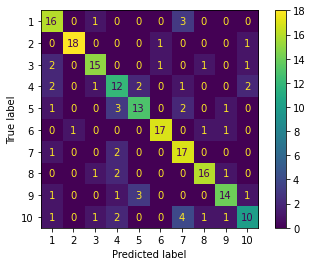

 

---------------------------------- 

*  KNN :
   Training Accuracy:  78.375 %
   Testing Accuracy: 71.0 % 

Test measures of the model on the all training data:
  F1 score with macro averaging for traing: 0.7844427267657889
  Precision score with macro averaging for traing: 0.7934420869389687
  Recall score with macro averaging for traing: 0.78375
 

Test measures of the model on the all testing data:
  F1 score with macro averaging for testing: 0.7112069396463307
  Precision score with macro averaging for testing: 0.7246957413427468
  Recall score with macro averaging for testing: 0.71
 



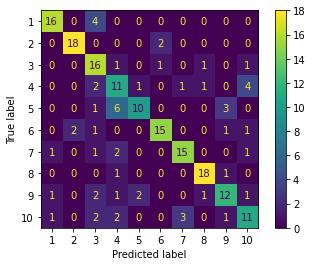

 

---------------------------------- 

*  gradient boosting classifier :
   Training Accuracy:  99.875 %
   Testing Accuracy: 82.0 % 

Test measures of the model on the all training data:
  F1 score with macro averaging for traing: 0.9987499511699676
  Precision score with macro averaging for traing: 0.9987654320987656
  Recall score with macro averaging for traing: 0.99875
 

Test measures of the model on the all testing data:
  F1 score with macro averaging for testing: 0.8215822526001568
  Precision score with macro averaging for testing: 0.83126724629299
  Recall score with macro averaging for testing: 0.82
 



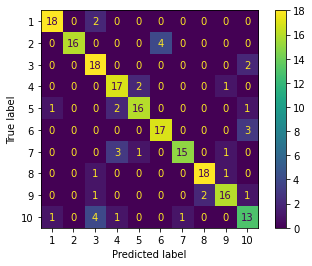

 

---------------------------------- 



In [ ]:
# Decission trees
tree = DecisionTreeClassifier(random_state=0)
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(random_state=0)
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(multi_class='multinomial',random_state=0)
model_assess(lg, "Logistic Regression")

# KNN
knn = KNeighborsClassifier()
model_assess(knn, "KNN")

# XGboosing
xgb = XGBClassifier(random_state=0)
model_assess(xgb, "gradient boosting classifier")

**Grid search for tunning hyperparameters of different models**

In [ ]:
def hyperparameter_tunning(estimator, param_grid):
  ###tune different hyperparameters on the estimator and return the estimator with best hyperparameters
  GS = sklearn.model_selection.GridSearchCV(estimator, param_grid, verbose=2, cv=4) 
  GS.fit(X_train, y_train)
  best_model = GS.best_estimator_
  print(f"best hyperparameters for {estimator}: {best_model}")
  return best_model

SVM

Fitting 4 folds for each of 147 candidates, totalling 588 fits
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ................C=0.001, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.001, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ..................C=0.001, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..................C=0.001, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..................C=0.001, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ..................C=0.001, gamma=0.00

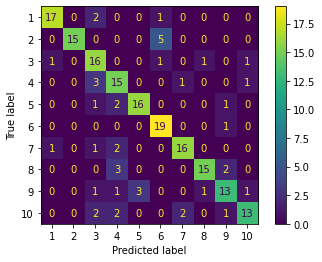

 

---------------------------------- 



In [ ]:
# Define prameters grid for desired model

C = np.logspace(-3, 3, 7) 
gamma = np.logspace(-3, 3, 7) 
kernel = np.array(['linear', 'rbf', 'poly'])
param_grid = {'C':C , 'gamma':gamma, 'kernel':kernel}

# define the estimator
estimator = SVC()

# call the function of hyperparameter tunning
SVM = hyperparameter_tunning(estimator, param_grid)

# Assess the accuracy of the model on training and test data
model_assess(SVM, "Support Vector Machine")

Random forest

Fitting 4 folds for each of 162 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   2.8s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=1000; total time=   2.8s
[CV] END bootstrap=True, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=1000; tota

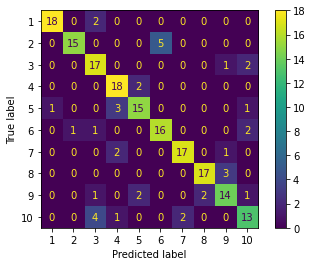

 

---------------------------------- 



In [ ]:
# Define prameters grid for desired model
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [8, 10, 12],
    'max_features': ['sqrt', 'log2', 'auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5,6,7],
    'n_estimators': [1000]
}
# define the estimator
estimator = RandomForestClassifier()
# call the function of hyperparameter tunning
RF = hyperparameter_tunning(estimator, param_grid)
# Assess the accuracy of the model on training and test data
model_assess(RF, "Random Forest with best hyperparameters")

KNN

Fitting 4 folds for each of 30 candidates, totalling 120 fits
[CV] END .................algorithm=ball_tree, n_neighbors=1; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=1; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=1; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=1; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=2; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=2; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=2; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=2; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=3; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=3; total time=   0.0s
[CV] END .................algorithm=ball_tree, n_neighbors=3; total time=   0.0s
[CV] END .................algorithm=ball_tree, 

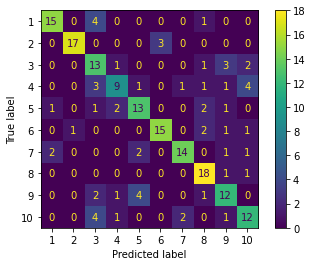

 

---------------------------------- 



In [ ]:
# Define prameters grid for desired model
param_grid = {
    'n_neighbors':np.linspace(1,10,10).astype(int), 
    'algorithm':np.array(['ball_tree', 'kd_tree', 'brute']) ,
                      }
# define the estimator
estimator = KNeighborsClassifier()
# call the function of hyperparameter tunning
knn = hyperparameter_tunning(estimator, param_grid)
# Assess the accuracy of the model on training and test data
model_assess(knn, "KNN")

XGboost classifier

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   7.0s
[CV] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   6.9s
[CV] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   7.0s
[CV] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=8, n_estimators=200; total time=   7.7s
[CV] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=10, n_estimators=200; total time=   7.1s
[CV] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=10, n_estimators=200; total time=   7.2s
[CV] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=10, n_estimators=200; total time=   7.4s
[CV] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=10, n_estimators=200; total time=   7.2s
[CV] END booster=gbtree, gamma=0.1, learning_rate=0.01, max_depth=12, n_estimators=200

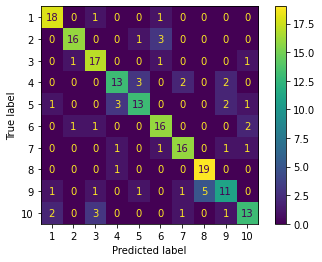

 

---------------------------------- 



In [ ]:
#####XGB classifier

param_grid = {
    'max_depth': [8, 10, 12],
    'learning_rate': np.logspace(-2, 0, 2),
    'gamma': np.logspace(-1, 1, 2),
    'booster': ['gbtree', 'gblinear', 'dart'],
    'n_estimators': [200]
}

# define the estimator
estimator = XGBClassifier()
# call the function of hyperparameter tunning
xgb = hyperparameter_tunning(estimator, param_grid)
# Assess the accuracy of the model on training and test data
model_assess(xgb, "XGB classifier")



*  XGB classifier :
   Training Accuracy:  99.875 %
   Testing Accuracy: 82.5 % 

Test measures of the model on the all training data:
  F1 score with macro averaging for traing: 0.9987499511699676
  Precision score with macro averaging for traing: 0.9987654320987656
  Recall score with macro averaging for traing: 0.99875
 

Test measures of the model on the all testing data:
  F1 score with macro averaging for testing: 0.8264857455347411
  Precision score with macro averaging for testing: 0.839826087655035
  Recall score with macro averaging for testing: 0.825
 



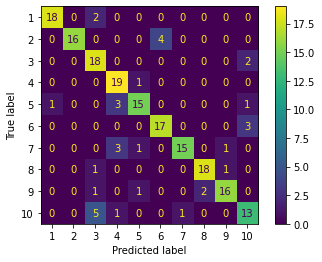

 

---------------------------------- 



In [ ]:
model = XGBClassifier(n_estimators=200)
model_assess(model, "XGB classifier")

logistic regression

Fitting 4 folds for each of 360 candidates, totalling 1440 fits
[CV] END C=0.1, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True; total time=   0.5s
[CV] END C=0.1, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True; total time=   0.3s
[CV] END C=0.1, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True; total time=   0.4s
[CV] END C=0.1, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=True; total time=   0.3s
[CV] END C=0.1, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False; total time=   0.3s
[CV] END C=0.1, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False; total time=   0.4s
[CV] END C=0.1, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False; total time=   0.3s
[CV] END C=0.1, max_iter=300, multi_class=ovr, penalty=l2, solver=lbfgs, warm_start=False; total time=   0.3s
[CV] END C=0.1, max_iter=300, multi_class=ovr, penalty=l2, s

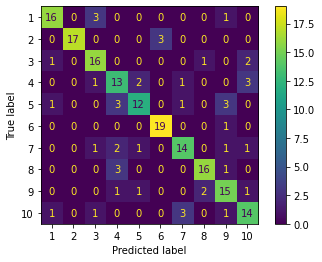

 

---------------------------------- 



In [ ]:
# Define prameters grid for desired model
param_grid = {
    'solver':['lbfgs', 'sag', 'saga'], 
    'max_iter':[300, 400, 500],
    'multi_class': ['ovr', 'multinomial'],
    'warm_start': [True, False],
    'penalty': ['l2', 'none'],
    'C': np.linspace(0.1, 1, 5)
                      }
# define the estimator
estimator = LogisticRegression(random_state=0)
# call the function of hyperparameter tunning
lr = hyperparameter_tunning(estimator, param_grid)
# Assess the accuracy of the model on training and test data
model_assess(lr, "logistic regression")

Randomized grid search for Random Forest

In [ ]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(6, 16, 6)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
rf_min_sample_leaf = [int(x) for x in range(5,10)]

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'min_samples_split': rf_min_samples_split,
               'min_samples_leaf': rf_min_sample_leaf,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}


# Create the model to be tuned
rf_base = RandomForestClassifier()

# Create the random search Random Forest
rf_random = sklearn.model_selection.RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 200, cv = 4, verbose = 2, random_state = 0, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

# View the best parameters from the random search
rf_random.best_params_

# evaluating model with best estimator
model_assess(rf_random.best_estimator_, "RF_random_grid")

Cross validation on final models

In [ ]:
# K-Fold Cross-Validation on all models with best hyperparameters
def cv_comparison(models, X, y, cv):
    # Initiate a DataFrame for the averages and a list for all measures
    cv_accuracies = pd.DataFrame()

    accuracy_score = []
    f1_score = []
    precision_score = []
    recal_score = []
    # Loop through the models, run a CV, add the average scores to the DataFrame and the scores of 
    # all CVs to the list
    for model in models:
        accuracy = np.round(cross_val_score(models[model], X, y, scoring='accuracy', cv=cv), 4)
        accuracy_score.append(accuracy * 100)
        accuracy_avg = round((accuracy.mean()), 4)

        f1 = np.round(cross_val_score(models[model], X, y, scoring='f1_macro', cv=cv), 4)
        f1_score.append(f1)
        f1_avg = round(f1.mean(), 4)

        precision = np.round(cross_val_score(models[model], X, y, scoring='precision_macro', cv=cv), 4)
        precision_score.append(precision)
        precision_avg = round(precision.mean(), 4)

        recal = np.round(cross_val_score(models[model], X, y, scoring='recall_macro', cv=cv), 4)
        recal_score.append(recal)
        recal_avg = round(recal.mean(), 4)

        cv_accuracies[model] = [accuracy_avg, f1_avg, precision_avg, recal_avg]
        
    cv_accuracies.index = ['Accuracy score', 'F1 score', 'Precision score', 'recall score']
    return cv_accuracies, accuracy_score, f1_score, precision_score, recal_score

In [ ]:
## Define models with best hyperparameters
xgb = XGBClassifier(random_state=0)
rf = RandomForestClassifier(bootstrap=False, max_depth=12, max_features='log2',min_samples_leaf=3, min_samples_split=6,n_estimators=1000)
svc = SVC(C=10.0, gamma=1.0, kernel='poly')
knn = KNeighborsClassifier(algorithm='brute', n_neighbors=1)
lr = LogisticRegression(multi_class='multinomial',random_state=0, max_iter=500, warm_start=True)

## build a set of models and pass it to function cv_comparison
models = {'logistic regression': lr,
          'K-nearest neighbors':knn,
          'Support vector machines':svc,
          'Random forest' :rf,
          'Gradint boosting classifier': xgb}

## define cross validation method to be used in cross_validation score function
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)

## get accuracy table and accuracy metrics with cross validation
accuracy_table, accuracy_score, f1_score, precision_score, recal_score  = cv_comparison(models, X_train, y_train, cv)

In [ ]:
#### plot performance metrics of models based on cross validation

import plotly.express as px
fig = px.line(accuracy_table * 100)
fig.update_layout(
        #title = 'Average score of 10 repeated 5-fold cross validation',
        xaxis_title = 'Accuracy Metric',
        yaxis_title = 'Score (%)',
        width =700 , height=500
)
fig.show()

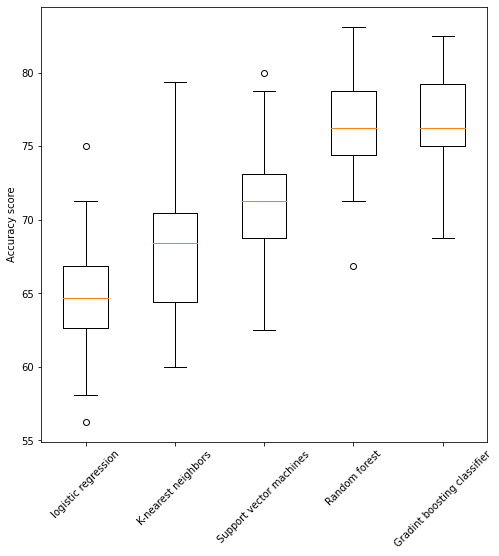

In [ ]:
## Boxplot of accuracy scores for repeated stratified cross validation on the training set
plt.figure(figsize=(8,8))
plt.boxplot(accuracy_score)
plt.ylabel('Accuracy score')
plt.xticks([1, 2 ,3, 4 ,5] ,[i for i in models], rotatin=45)
plt.show();